# Color Correction using Neural network
the neural network model is followed by : https://www.kaggle.com/preslavrachev/wip-photo-colorization-using-keras

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt

import time

from IPython.display import display, Image
from matplotlib.pyplot import imshow
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

import glob

Using TensorFlow backend.


### Importing Data

In [3]:
import os
image_source_raw = "F:/Pritom/Experiment/Datasets/underwater/raw-890/"
image_source_reference = "F:/Pritom/Experiment/Datasets/underwater/reference-890/"
# c = os.listdir(image_source_raw)
# c

In [4]:
X = glob.glob(image_source_raw+"/*") 
Y = glob.glob(image_source_reference+"/*") 

### Data Visualization

(480, 640, 3)


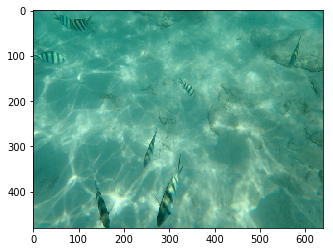

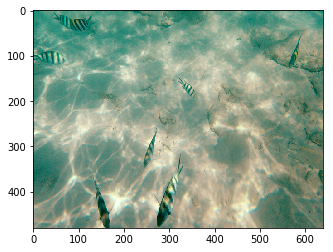

In [5]:
idx = 100
image_raw = cv2.imread(X[idx])
image_reference = cv2.imread(Y[idx])
imageX = cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
imageY = cv2.cvtColor(image_reference,cv2.COLOR_BGR2RGB)
print(imageX.shape)
plt.figure(1)
plt.imshow(imageX)
plt.figure(2)
plt.imshow(imageY)

### Data Processing

In [6]:
def image_to_array(image_path,dim):
    '''
    Return Image array from image directory
    image_to_array(image_path,(height,width,channel))
    '''
    img_data = np.ndarray((len(image_path),dim[0],dim[1],dim[2]),dtype=np.uint8)
    for i,img in enumerate(image_path):
        X_raw = cv2.imread(img)
        X = cv2.cvtColor(X_raw,cv2.COLOR_BGR2RGB)
        X_resize = cv2.resize(X,(dim[0],dim[1]))
        img_data[i] = X_resize #normalized image
    return img_data

In [7]:
start = time.time()
X_data = image_to_array(X,(256,256,3))
Y_data = image_to_array(Y,(256,256,3))
end = time.time()


In [8]:
print('Total Elapsed Time for Data Preparation:',(end-start)/60,'minutes')

Total Elapsed Time for Data Preparation: 1.5022993644078573 minutes


In [9]:
#normalizing data
X_data = X_data.astype('float32') / 255
Y_data = Y_data.astype('float32')/255

How to Recover normalized data <br>

unnorm = norm*255 <br>
unnorm = unnorm.astype(int)<br>

In [10]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split( X_data,Y_data,test_size=0.2, random_state=42)

### Model Definition

In [11]:
# model = Sequential()
# model.add(InputLayer(input_shape=(256, 256, 3)))
# model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
# model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))

# # Finish model
# model.compile(optimizer='adam', loss='mse')

In [15]:
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 3)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=1))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=1))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=1))
#model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
#model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))

# Finish model
model.compile(optimizer='adam', loss='mse')

In [16]:
train_start = time.time()
history = model.fit(X_train,Y_train, batch_size=1, epochs=10)
train_end = time.time()
print('Total Elapsed Time for training:',(train_end-train_start)/60,'minutes')

Epoch 1/10
712/712 [==============================] - 431s 605ms/step - loss: 0.0364
Epoch 2/10
712/712 [==============================] - 412s 579ms/step - loss: 0.0255
Epoch 3/10
712/712 [==============================] - 647s 909ms/step - loss: 0.0238
Epoch 4/10
712/712 [==============================] - 622s 874ms/step - loss: 0.0235
Epoch 5/10
712/712 [==============================] - 617s 866ms/step - loss: 0.0230
Epoch 6/10
712/712 [==============================] - 610s 856ms/step - loss: 0.0225
Epoch 7/10
712/712 [==============================] - 422s 593ms/step - loss: 0.0212
Epoch 8/10
712/712 [==============================] - 452s 635ms/step - loss: 0.0214
Epoch 9/10
712/712 [==============================] - 442s 621ms/step - loss: 0.0207
Epoch 10/10
712/712 [==============================] - 454s 638ms/step - loss: 0.0211
Total Elapsed Time for training: 85.18486985762914 minutes


In [17]:
history2 = model.evaluate(X_test, Y_test, batch_size=1)

178/178 [==============================] - 20s 111ms/step


In [39]:
history2

0.023588797943457293

###### Report

- Different Loss Function and Optimizer <br>
**Optimizer = Adam | Loss = mse**
- Epoch = 10 | Train: 0.0248 , Test: 0259
- Epoch = 100 | Train: 0.0201 , Test: 0.0222
<br>
*NO STRIDE*
<br>
- Epoch = 10 | Train: 0.0211 , Test: 0.02358 | Time : 85.1848 minutes
<br>
**Optimizer = Adam | Loss = mean_squared_logarithmic_error**
- Epoch = 10 | Train: 0.0121 , Test: 0.0123


In [35]:
indx = 555
xx = model.predict(X_train[indx:indx+1])

In [36]:
xx = xx*255
xx = xx.astype(int)

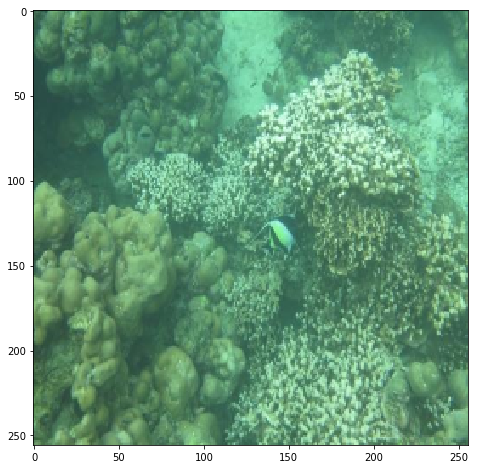

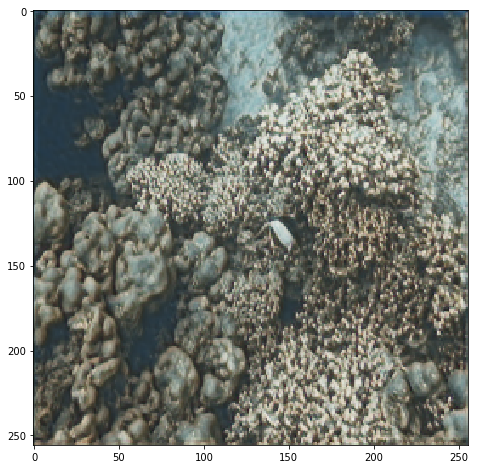

In [41]:
#plt.figure(figsize=(8,8))
plt.figure(1)
plt.imshow(X_train[indx])
#plt.figure(figsize=(8,8))
plt.figure(2)
plt.imshow(xx[0])

In [31]:
#cv2.imwrite('output.jpg',xx[0])

In [1]:
#plt.plot(history.history['loss'])

### Histogram Equilization

In [ ]:
import PIL

In [ ]:
xx2 = X_test[indx]*255
xx2 = xx2.astype(int)

In [ ]:
add1 = PIL.Image.fromarray(xx2)

In [ ]:
equ = cv2.equalizeHist(xx2)
  
# stacking images side-by-side 
res = np.hstack((xx,qu)) 